In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay

In [368]:
bank = pd.read_csv("C:/Data/Bank_churn.csv")

In [370]:
bank.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


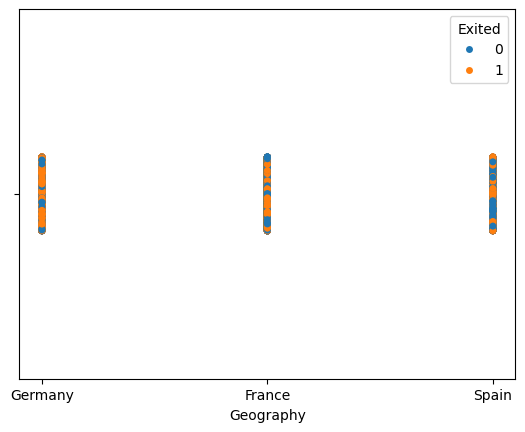

In [372]:
sns.stripplot(x = 'Geography', data = bank[(bank.NumOfProducts == 1) & (bank.Gender == 'Female') & (bank.Age >= 38)], hue = 'Exited')
plt.show()

In [374]:
X = bank[bank.Age >= 38][['Geography','NumOfProducts','Gender','Age']]
y = bank[bank.Age >= 38]['Exited']
X.shape, y.shape

((77437, 4), (77437,))

In [376]:
encoding = LabelEncoder()
columns = [['Geography', 'Gender']]
X['Geography'] = encoding.fit_transform(X["Geography"])
X['Gender'] = encoding.fit_transform(X["Gender"])

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=10, test_size=11000)
X_train.shape, X_test.shape

((66437, 4), (11000, 4))

In [380]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=300)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7809090909090909

In [382]:
model.feature_importances_

array([0.06792567, 0.62184736, 0.05007091, 0.26015606])

In [384]:
model.get_depth(), model.get_n_leaves()

(8, 189)

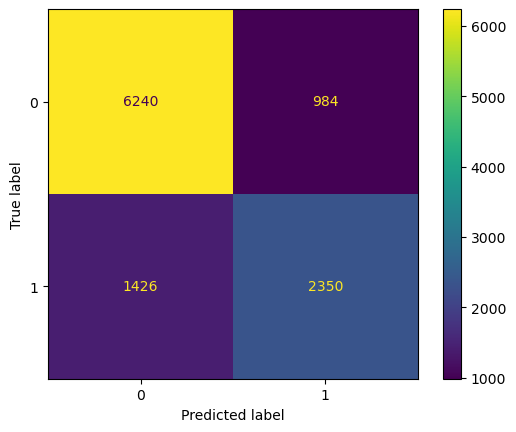

In [388]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()